In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
import time
import webscraping

### Let's take a look at the top teams in La Liga

In [2]:
#data collection
webscraping.get_laligaTopGoals()

In [2]:
#data cleaning
df = pd.read_csv("laligaTopGoals.csv")
df = df.head(n=6)
df = df.drop(columns=['Unnamed: 0', 'YC', 'RC', 'F', 'OFF', 'HG', 'KG'])
df.rename(columns={'STANDARD':'Name', 'GP': 'Games', 'GF':'Goals', 'A':'Assists', 'SOG':'Shots on Goal', 'S':'Total Shots'}, inplace=True)
for i in range(6):
    if(df.at[i, 'Name'].split()[1] == df.at[i, 'Name'].split()[2]):
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1]
    else:
        df.at[i, 'Name'] = df.at[i, 'Name'].split()[1] + df.at[i, 'Name'].split()[2]
    df.at[i, 'Goals/Game'] = (df.at[i, 'Goals']/df.at[i, 'Games'])
print(df)

             Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0       Barcelona     27     69       49            187          408   
1      RealMadrid     27     47       26            157          435   
2         Sevilla     27     46       34            131          384   
3  AtléticoMadrid     27     39       25            116          311   
4         Levante     27     37       26            112          312   
5       CeltaVigo     27     36       27            115          305   

   Goals/Game  
0    2.555556  
1    1.740741  
2    1.703704  
3    1.444444  
4    1.370370  
5    1.333333  


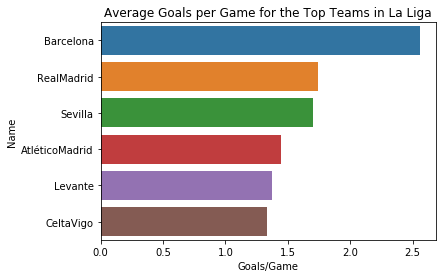

In [3]:
#visualization of top scorers per game
#df1 = df.sort_values(['Goals/Game'])
bar1 = sns.barplot(x='Goals/Game', y='Name', data=df)
#bar1.set_xticklabels(bar1.get_xticklabels(),rotation=90)
plt.title('Average Goals per Game for the Top Teams in La Liga')
plt.show()

In [4]:
#create 2 new columns for shooting accuracy and coversion rate
#shooting accuracy is given by (shots on goal/total shots)*100%
#conversion rate is given by (goals/shots on goal)*100%
for i in range(6):
    df.at[i, 'Shooting Accuracy(%)'] = (df.at[i, 'Shots on Goal']/df.at[i, 'Total Shots'])*100
    df.at[i, 'Conversion Rate(%)'] = (df.at[i, 'Goals']/df.at[i, 'Shots on Goal'])*100
print(df)

             Name  Games  Goals  Assists  Shots on Goal  Total Shots  \
0       Barcelona     27     69       49            187          408   
1      RealMadrid     27     47       26            157          435   
2         Sevilla     27     46       34            131          384   
3  AtléticoMadrid     27     39       25            116          311   
4         Levante     27     37       26            112          312   
5       CeltaVigo     27     36       27            115          305   

   Goals/Game  Shooting Accuracy(%)  Conversion Rate(%)  
0    2.555556             45.833333           36.898396  
1    1.740741             36.091954           29.936306  
2    1.703704             34.114583           35.114504  
3    1.444444             37.299035           33.620690  
4    1.370370             35.897436           33.035714  
5    1.333333             37.704918           31.304348  


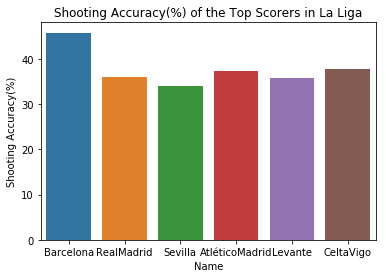

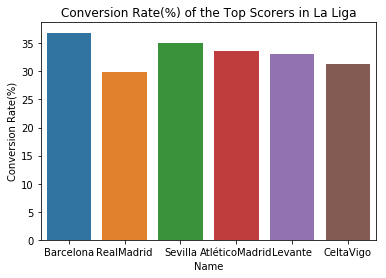

In [5]:
#visualization of top scorers' shooting accuracy and conversion rate
#df2 = df.sort_values(['Shooting Accuracy(%)'])
bar2 = sns.barplot(x='Name', y='Shooting Accuracy(%)', data=df)
plt.title('Shooting Accuracy(%) of the Top Scorers in La Liga')
plt.show()

#df3 = df.sort_values(['Conversion Rate(%)'])
bar3 = sns.barplot(x='Name', y='Conversion Rate(%)', data=df)
plt.title('Conversion Rate(%) of the Top Scorers in La Liga')
plt.show()